# Workshop - Building a neural network

Hello all - welcome to the final workbook for the DAIM - Images course. Throughout this notebook, you will be introduced to more advanced aspects of Python. We will go through designing, testing, and evaluating a neural network from scratch in Python, which will give you insight into how to build basic machine learning models for other applications, and should give you a good starting point for further learning in the world of data science.

This workbook will be run over several workshops, and will require time spent outside of the workshops to complete. We would encourage you to use the sources of online support that we have used in previous sessions to help you. The only way to learn how to code is through doing it and solving problems!

By the end of this workshop, you should be able to:
* *to be completed*

## Introduction - The Dataset

The dataset that we will use for this workbook is [this one](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/data): a dataset of 5,863 plain chest XRs which have been labelled by clinicians as either:

1. Normal
2. Pneumonia

Have a read about the dataset via the link above and think about the following:

1. What limitations might this labelling scheme have?
2. Are there any sources of clinical bias that could be introduced?
3. Can you think of any disadvantages of the image encoding they have used?

If you would like to read more about this dataset, you can refer to [this publication](https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5).

The reason we have chosen this dataset for this exercise is the small size (2GB) and simple labelling. Many medical machine learning datasets run into the terabyte range, and have many labels associated with each datapoint. Starting here will give you a better insight into how these models actually work.

To download the model, execute the following commands in the Colab workbook:

In [1]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

If these commands are successful, you should see lots of lines of terminal output as the `unzip` command unzips each of the ~5000 images.

*NB if you are running these commands locally, enter them into your terminal window without the preceding "!"*
*The "!" tells Colab to run this command as a terminal command on the server that we are running, rather than as a line of Python code.*

## Importing the necessary packages

This workbook uses a few external libraries to make our work easier and to provide high-level *abstraction* away from the way that machine learning works "under the hood". Run the following code to import all the necessary packages.

In [ ]:
import os
import random
import numpy as np
from matplotlib import pyplot as plt

from tensorflow import keras
from keras.models import load_model

from PIL import Image
from PIL import ImageOps
import sklearn.metrics as metrics
from torchvision.transforms import functional as F

# Stage One - Inspecting the dataset

We've downloaded the data - what form is it in? This will be vital to understanding how to preprocess it into a form that a neural network can be trained on.

In any dataset, there will be the raw data (images, time-series data, etc.) and semantic labels. The term "semantic" in this context refers to giving data "meaning" - your computer doesn't know what the image data contains unless you label it.

The labels describe the attribute that you want to predict with your model. Common formats for these include:

1. Raw data sorted into directories
2. A large table detailing the datapoints with their associated semantic labels, stored as a CSV file.

Which of the above categories does our data, `chest_xray`, fall in to? To see the data, select the folder icon on the left-hand side of the screen, or navigate to the directory that you are running this workbook from.

## How machine learning datasets are split

This dataset is split into 3 folders: test, train, and validation. For a recap from the seminar:

1. Training data is the largest partition of the dataset and is what is used to update the weights of the model during training.
2. Testing data is used to test the data at the end of training - a finals exam. The model never "sees" any of this data at any point during training.
3. Validation - this data is used to evaluate the model during training. The model is not trained on this data.

If you are collecting this data in the real world, the dataset will often not be split like this, and it is the job of the data scientist to partition it appropriately.

## Exercise 1 - Opening an image

Let's start by displaying a few images from the dataset. Open and display the first few normal images from the `chest_xray/test` directory. *Hint: use the os.listdir() and os.path.join() methods.*

*NB: ignore the* `chest_xray/chest_xray` *subdirectory for the rest of the practical.*

In [2]:
# Type your code here...

### Solution 1

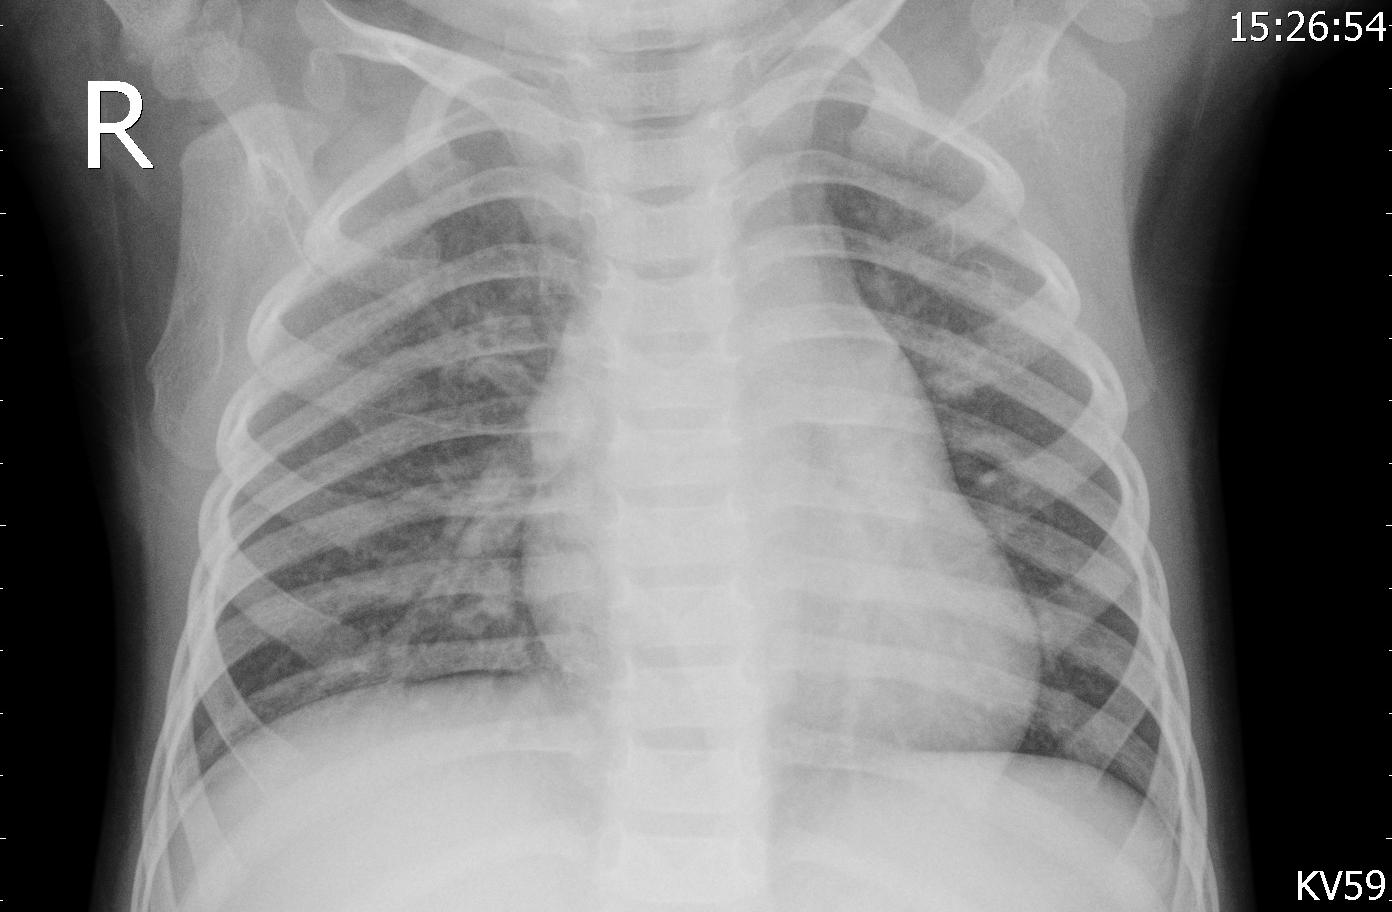

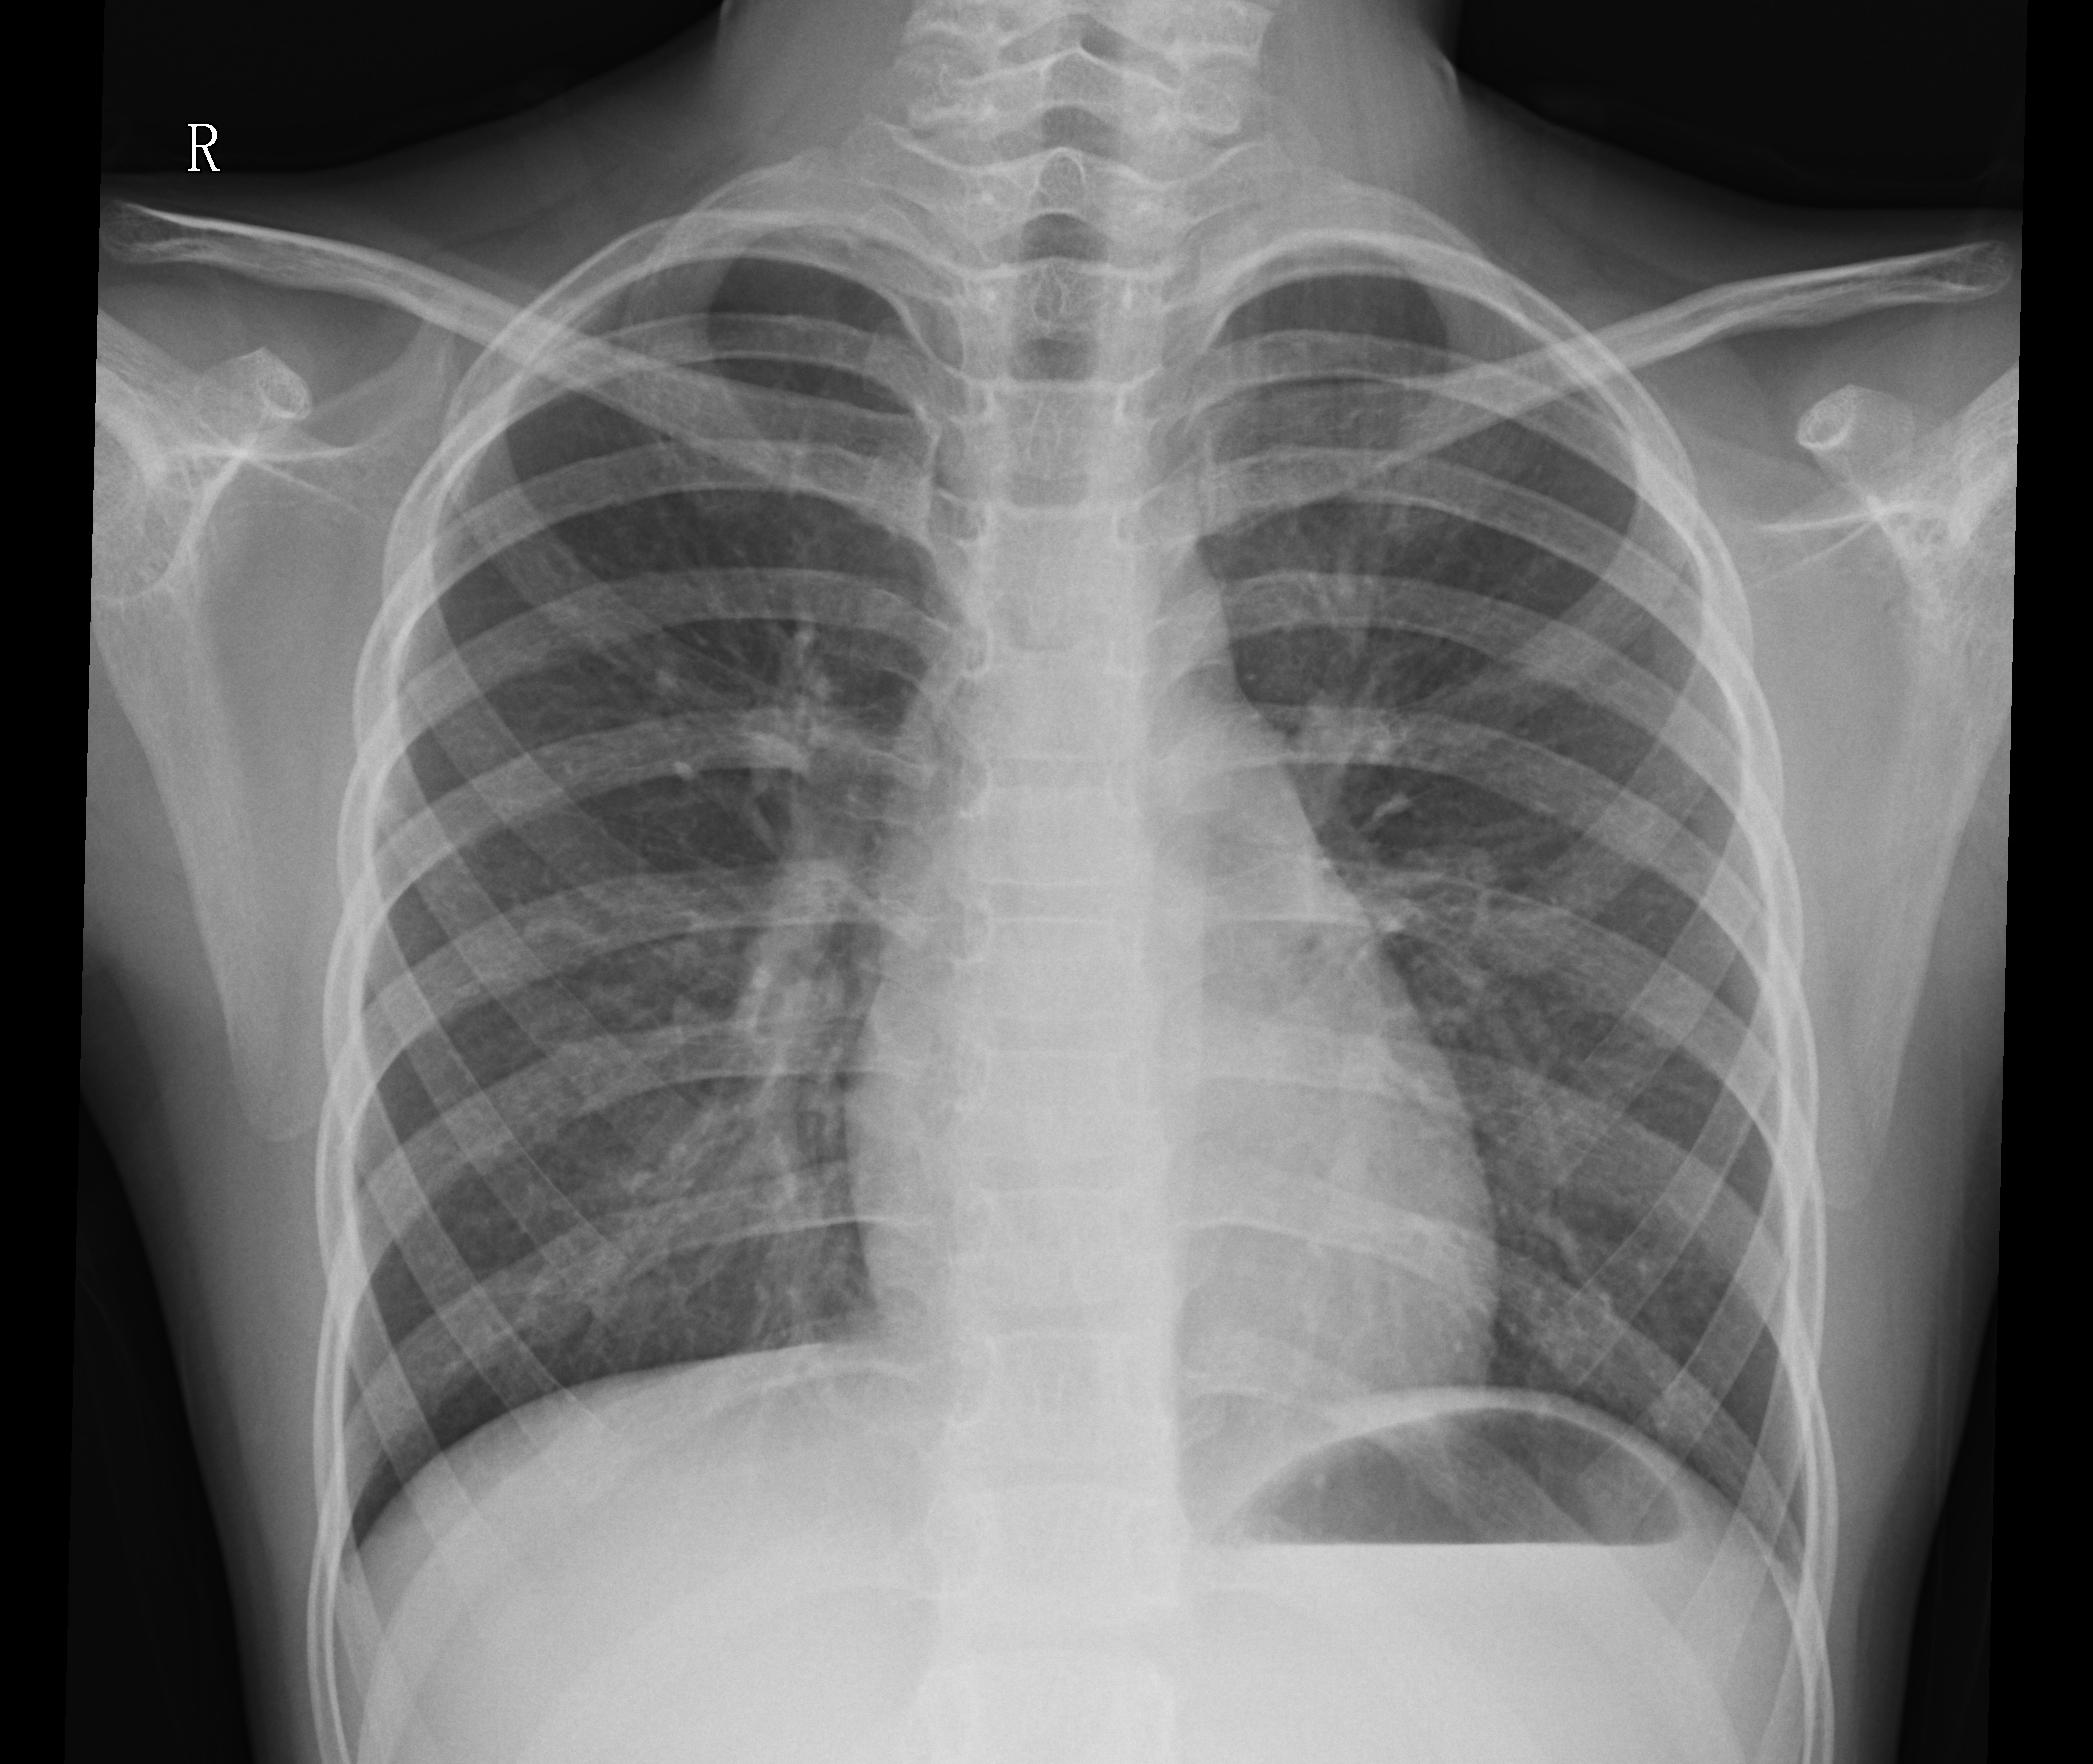

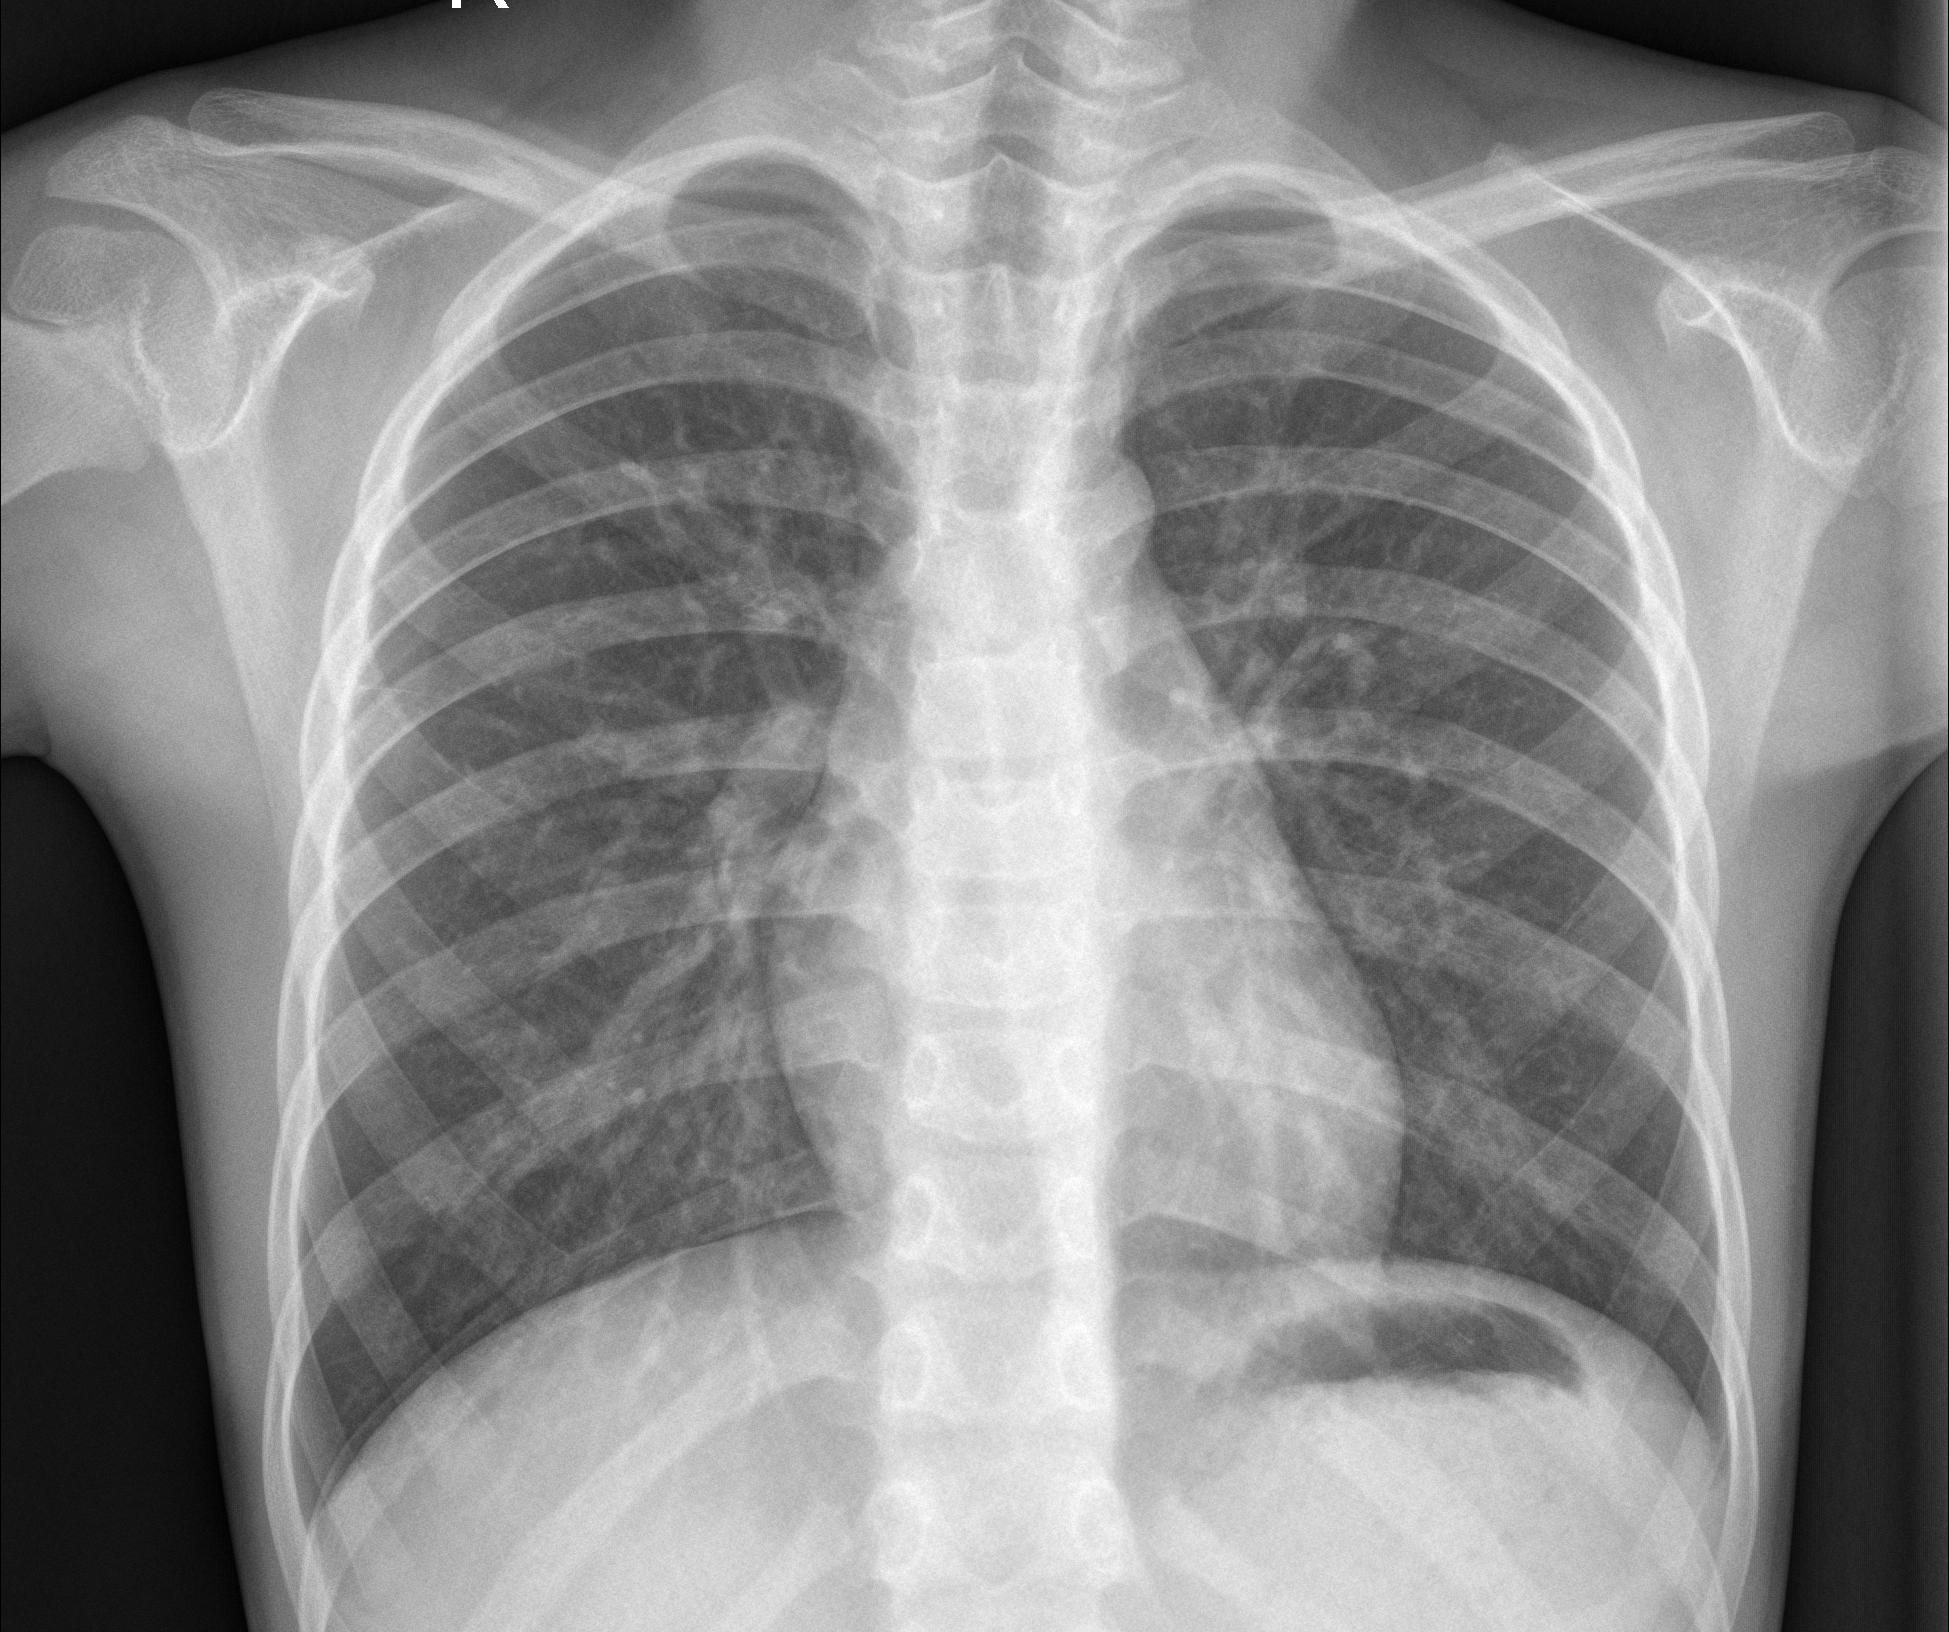

'\nUsing os.listdir is more reusable than simply copy-pasting the desired image file\npaths into the Image.open() command.\n'

In [3]:
#@title

target_dir = "chest_xray/test/NORMAL"
normal_image_paths = os.listdir(target_dir)
for path in normal_image_paths[:3]:
    full_path = os.path.join(target_dir, path)
    im = Image.open(full_path)
    display(im)

"""
Using os.listdir is more reusable than simply copy-pasting the desired image file
paths into the Image.open() command.
"""

## Exercise 2

Next, using your code from the previous exercise, create a function that will show a certain number of images from either the normal or pneumonia directories. Use this to display some of the pneumonia XRs from the test dataset. The number of images requested and the label should be passed as arguments.

*Try to think about error handling when designing this function - when might the function fail?*

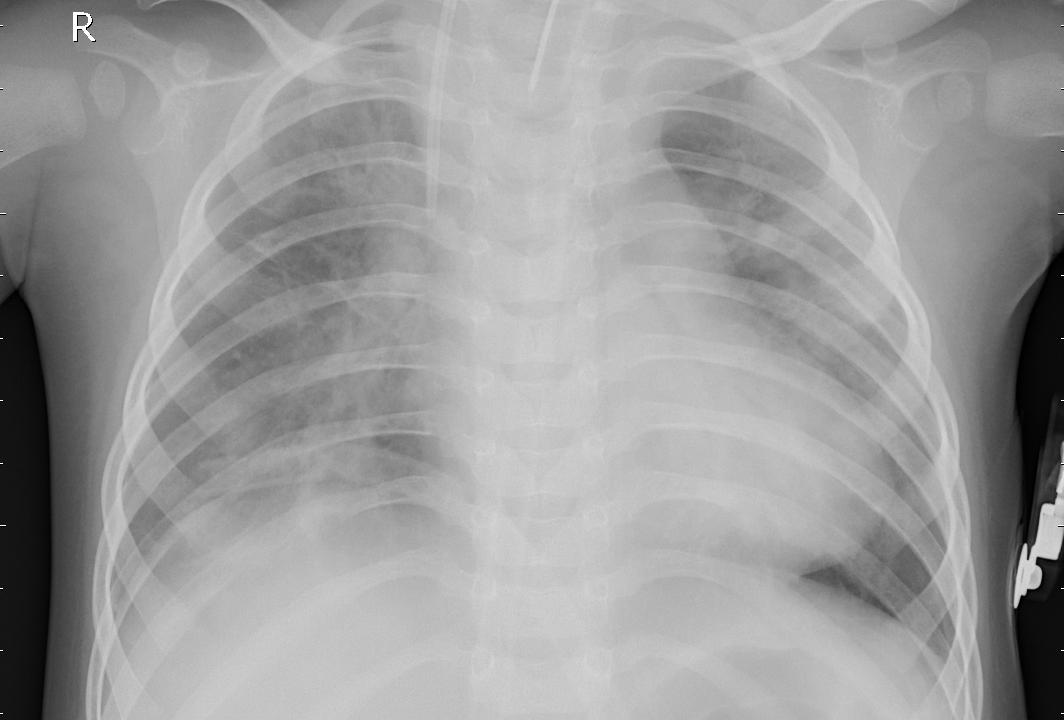

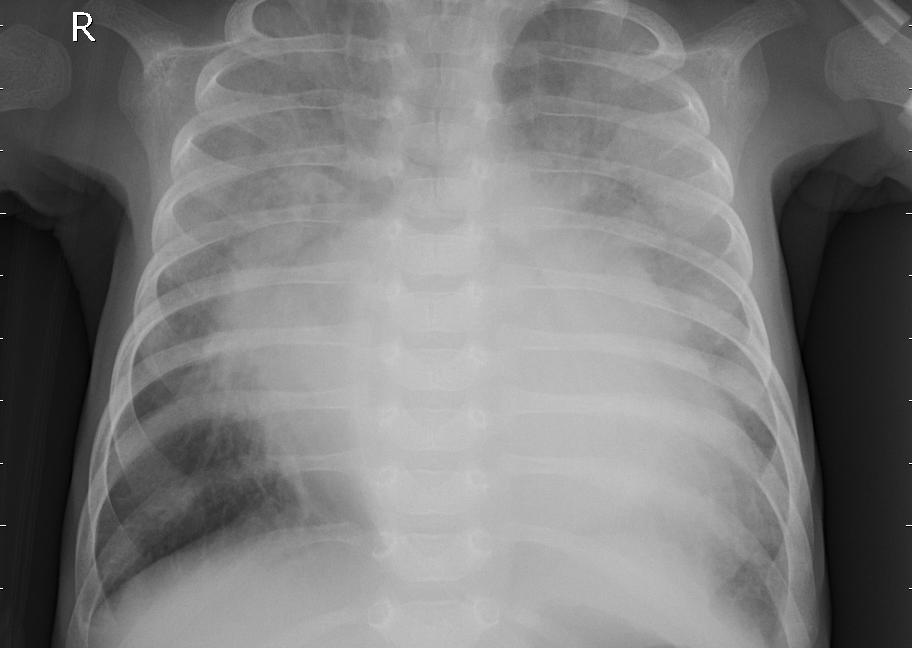

'\nUsing string formatting on line 3 here allows for clear insertion of the desired label\ninto the target directory. Appending the strings with "+" would also be appropriate.\nUse of "os.path.join" is good practice, rather than stitching together the string manually with "/"\nas it is less error prone.\n\nAlways think about catching errors - what if the number of images\nrequested was larger than the number available in the directory?\n'

In [4]:
def show_images(label, num_images=3):

    target_dir = "chest_xray/test/{}".format(label)
    image_paths = os.listdir(target_dir)

    if num_images > len(image_paths):
        raise Exception(f"Too many images ({num_images}) requested!")

    for path in image_paths[:num_images]:
        full_path = os.path.join(target_dir, path)
        im = Image.open(full_path)
        display(im)

show_images("PNEUMONIA", 2)
# show_images("PNEUMONIA", 100000) # This results in an error.

"""
Using string formatting on line 3 here allows for clear insertion of the desired label
into the target directory. Appending the strings with "+" would also be appropriate.
Use of "os.path.join" is good practice, rather than stitching together the string manually with "/"
as it is less error prone.

Always think about catching errors - what if the number of images
requested was larger than the number available in the directory?
"""

## Exercise 3

Write a simple script which reports the total number of images in each partition (test/train/validation) and each label (normal/pneumonia) of the dataset.

*NB: again, ignore the* `chest_xray/chest_xray` *subdirectory.*

In [5]:
def report_dir(partition, file_path="chest_xray", labels=["NORMAL", "PNEUMONIA"]):

    file_path = os.path.join(file_path, partition)

    for label in labels:
        imgs = os.path.join(file_path, label)
        img_num = len(os.listdir(imgs))
        print(f"\t{label}: {img_num}")

print("Training data: ")
report_dir("train")

print("Testing data: ")
report_dir("test")

print("Validation data: ")
report_dir("val")

Training data: 
	NORMAL: 1341
	PNEUMONIA: 3875
Testing data: 
	NORMAL: 234
	PNEUMONIA: 390
Validation data: 
	NORMAL: 8
	PNEUMONIA: 8


**Solution breakdown**

There is no right/wrong way to write this code, and there are multiple ways to
achieve the task in the exercise. In general, code should be duplicated as little
as possible whilst still maintaining clarity about what it does. It is very easy
to obfuscate code with the single goal of making it take up fewer lines.

As the structure of each partition directory is identical, it makes sense to write a
report_dir function which prints the report for any of the three directory.

I have passed the file_path and labels as arguments to make the function
reusable - what if we had a similar dataset for NORMAL/PE which was
called chest_ct?

This gives you an idea of the overall size of the dataset we are working with. We can see from the output of this function that we have many more abnormal X-rays than normal ones in the training partition - how might this affect training?

# Stage 2 - Preprocessing

Preprocessing refers to preparing the data for training a machine learning system. It is often the most time-consuming part of designing a machine learning system.

All machine learning training methods require data to be in a certain format. This is because the model's input layer has a certain shape, which has to be matched by our input image. For images, these constraints can include:

1. **Input image size** - in our case, most images are far higher resolution than it would be possible to build a convolutional neural network to process. You will be able to test this later in the practical.
2. **Input image dimensions** - often, networks require square images to make computations easier.
3. **Input image channels** - often, images need to be greyscale. Luckily, this is not an issue for us.

Over the next few exercises, we will build up a function that is able to do this, before considering later stages of pre-processing.

## Exercise 4

Let's consider a single image to make the process of code design easier. Write a function that takes an image filepath, opens the image, and appropriately center crops it to a set of dimensions that is passed as an argument. All images returned from the function must be square.

Hint: use [this StackOverflow issue](https://stackoverflow.com/questions/16646183/crop-an-image-in-the-centre-using-pil) to help you.

## Solution

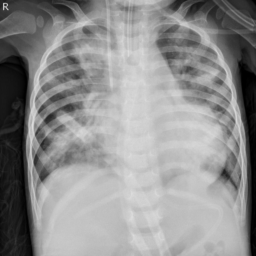

In [6]:

def crop_and_scale(img, target_size):

    # Crop the center of the image
    height, width = img.size
    square_size = min(height, width)
    img = F.center_crop(img, square_size)

    # Resize the image
    resized_im = F.resize(img, (target_size, target_size))
    return resized_im

test_im = "chest_xray/train/PNEUMONIA/person986_bacteria_2913.jpeg"
im = Image.open(test_im)

im = crop_and_scale(im, 256)
display(im)

**Solution Breakdown**

I decided to import and use a function from the Torch library here, as
it is simple and will cover cases that might cause errors in a simple
implementation. Torch is a machine learning library, and the presence of
this function in the library shows how common an issue this is for
data scientists.

As we want all images from the function to be square, there is no reason
to pass in 2D dimensions to the function, as they will always be the
same e.g. (64, 64)

## Exercise 5 - Specifying constraints

Let's extend our preprocessing function. The machine learning model will be accepting the images in array form. Each image must have:

1. Only 1 channel (greyscale)
2. All values must be between `0.0` and `1.0`

Use your test image and preprocessing function from the last code block and inspect the images in NumPy array format to confirm that they meet the two constraints.

### Solution

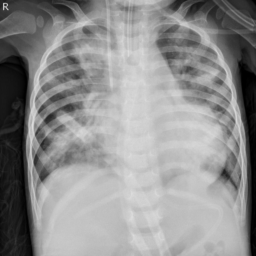

(256, 256)
220 0


In [7]:
test_im = "chest_xray/train/PNEUMONIA/person986_bacteria_2913.jpeg"
im = Image.open(test_im)

im = crop_and_scale(im, 256)
display(im)

im_arr = np.array(im) # Convert to Numpy Array

print(im_arr.shape)
print(im_arr.max(), im_arr.min())

**Solution Breakdown**

The image has the appropriate shape and dimensions, but has a max value of much higher than 1.0. This demonstrates that it is still in 8 bit integer format.

## Exercise 6

Appropriately modify the preprocessing function to correct for the problem identified in the previous exercise and to make the function return NumPy arrays rather than PIL Images.

*NB: Some images in this dataset are opened as colour images (i.e. with 3 channels). How can you prevent this from affecting the output of the function?*

## Solution

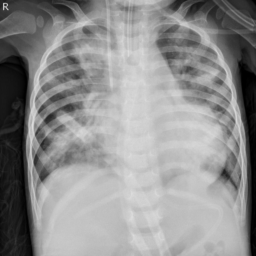

In [8]:
def crop_and_scale(img, target_size):

    # Crop the center of the image
    height, width = img.size
    square_size = min(height, width)
    img = F.center_crop(img, square_size)

    # Resize the image
    resized_im = F.resize(img, (target_size, target_size))
    grayscale_im = ImageOps.grayscale(resized_im)

    return np.array(grayscale_im) / 255.0

test_im = "chest_xray/train/PNEUMONIA/person986_bacteria_2913.jpeg"
im = Image.open(test_im)

im_arr = crop_and_scale(im, 256)

# Code to convert from array back to PIL Image:
im = Image.fromarray((im_arr * 255.0).astype(np.uint8))
display(im)

**Solution breakdown**

The image is converted into a NumPy array with `np.array()` and scaled down by `255.0`, to convert from 8 bit integers (0-255) to floating point numbers (0.0-1.0). This also ensures that the numbers are "normalised" - within a specified range.

# Stage 3 - Batching and Sampling

A machine learning model accepts data in batches. A batch is a small collection of images that are used for one step of training. Every image is passed through the network in its current state, and then the 'errors' are averaged out between the images in the batch to update the weights. This is important to know because:

1. The larger the batch, the more accurate the estimate of the 'direction' the model needs to go in to reduce its error rate.

However, usually a batch needs to be loaded into RAM from the disk/SSD for it to be processed. A batch of uncompressed image data can get very large, very fast!

*Side task - how many bytes of data would a batch of 2048 images at 512x512 pixels be?*

Before we create our batching function, we have to consider how we are going to sample data for each batch. Ideally, each batch should contain similar amounts of each data from each class - in our situation, normal/pneumonia.

However, our dataset is **unbalanced** - there is more pneumonia data than normal data. In order to combat this, we will **oversample** the normal data - the network will "see" the normal data more times than the pneumonia data. This has advantages and disadvantages:

1. It is easy to do.
2. It can lead to overfitting. If the dataset was extremely unbalanced, the model may start to interpret normal anatomical variations as pneumonia, as it has not had adequate exposure to normal data.

Before oversampling data, you should make sure that there is enough diversity in the dataset to allow the model to learn the characteristics that you want.

## The process of training

During the training process, the model will "see" each data point multiple times. When creating the batches, we will use random sampling to ensure good diversity between each batch - no two batches should be the same. This will help the model gain a good average of the "direction" it should move in over successive batches.

## Excercise 7a - Getting the full dataset

Before we sample random batches, we need the list that tells us where we can sample the images from. This will come in the form of a list of filepaths, which point to the images in the training dataset that we can sample.

For this exercise, create a function called `get_filepaths` which returns a list of all of the filepaths to each of the available images in the given dataset partition (i.e. `train`, `test`, `val`)

Print the first few filepaths to briefly check your work.

In [72]:
def get_filepaths(partition="train"):

    root_path = "chest_xray"
    labels = ["NORMAL", "PNEUMONIA"]

    file_paths = []
    for i, label in enumerate(labels):
        path = os.path.join(root_path, partition, label)
        image_fns = [os.path.join(path, x) for x in os.listdir(path)]

        file_paths += image_fns

    return file_paths

fps = get_filepaths()
print(fps[:5])

['chest_xray/train/NORMAL/NORMAL2-IM-1319-0001.jpeg', 'chest_xray/train/NORMAL/IM-0354-0001.jpeg', 'chest_xray/train/NORMAL/NORMAL2-IM-1162-0001.jpeg', 'chest_xray/train/NORMAL/IM-0698-0001.jpeg', 'chest_xray/train/NORMAL/NORMAL2-IM-0986-0001.jpeg']


## Exercise 7b - Batching data

Write a function that creates batches from a specified directory (test/train/val). Pass the filepaths for the dataset that you generate with `get_filepaths()` to the function. Make sure you use random sampling for each batch.

1. **Use online sources of information to help you.** StackOverflow can be very helpful for building functions like this.
2. Make sure you think about error handling when designing the function. What combination of input parameters would cause the function to fail?
3. Use the `crop_and_scale` function from Exercise 6 to preprocess the images.
4. Use ideas from the previous exercises to help you get started.
5. It is helpful to plan each step you will need to include for the function with comments.

The function should be called `make_batch`. The function is specified below:

```python
def make_batch(img_filepaths, im_size, batch_size):
    """
    Returns a randomly sampled batch of images from the chest_xray dataset for training.

    Parameters
    ----------
    img_filepaths : lst
        List of image filepaths to sample from.
    im_size : int
        The square image dimension of the images in the batch.
    batch_size : int
        The desired size of the batch.

    Returns
    -------
    np.array
          Batch of images, stored in a 3D array. Shape: (batch_size, im_size, im_size)

    Examples
    --------
    >>> make_batch("NORMAL", 256, 4).shape
    (4, 255, 255)
    """
```

*NB: This is called a docstring, and is a way to document what your Python function does. It  should provide a description of what your function does and can be shown in code editors like VS Code when you hover over a function name.*

### Solution

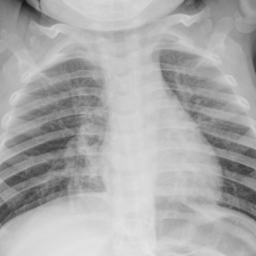

In [75]:
def make_batch(image_filepaths, im_size, batch_size):

    # Randomly sample image filepaths for the batch.
    batch_paths = random.sample(image_filepaths, batch_size)

    batch = np.zeros((batch_size, im_size, im_size))
    for i, path in enumerate(batch_paths):
        im = Image.open(path)
        batch[i] = crop_and_scale(im, im_size)

    return batch

train_fps = get_filepaths("train")
batch = make_batch(train_fps, 256, 4)

# Inspect the images.
im = Image.fromarray((batch[3] * 255.0).astype(np.uint8))
display(im)

**Solution breakdown**

This function documents the stages it goes through in order to generate a batch of images. One potential way to improve it would be to get rid of the duplication of the `NORMAL` and `PNEUMONIA` lines of code for each step of the process - this would be especially helpful if there were more than 2 labels. However, for the purposes of clarity, I have left it as it is.

There is a more error handling that could be performed - what else do you think should be checked?

## Encoding Labels

We now have a way to feed the neural network batches of data. However, the neural network does currently not know what each image represents. In order to do this, we have to preprocess the labels for each batch too.

Our labels for this dataset are "PNEUMONIA" and "NORMAL" - these are strings, discrete data. In order for the network to train on these labels, we have to encode the labels into numbers. This is because the network calculates the error between the output of the network and the labels we provide.

For our network, we will encode 0.0 as "NORMAL", and 1.0 as "PNEUMONIA". This is a **label encoding**, as we are assigning integer values to each label - 0 or 1, NORMAL or PNEUMONIA.

## Difference between label and one-hot encoding

A large proportion of encoding for image datasets in machine learning occurs as one-hot encoding. This sets a 1 for features that are present, and 0 for ones that are not. For example:

```
Data: Image of a cat
Labels: [dog, cat, fish, bear]
Encoding: [0, 1, 0, 0]
```

For our network, this would be:
```
Image: Pneumonia
Labels: [NORMAL, PNEUMONIA]
Encoding: [0, 1]
```

We will use label encoding for simplicity - the network will only have one output neuron:

```
Image: Pneumonia
Labels: [NORMAL, PNEUMONIA]
Encoding: [1]
```


## Exercise 8 - Adding labels

Add label generation to the `make_batch` function. An updated docstring for what the function should return is given below:

```python
def make_batch(partition, im_size, batch_size):
    """
    Returns an equally balanced batch of images from the chest_xray dataset for training.

    Parameters
    ----------
    img_filepaths : lst
        List of image filepaths to sample from.
    im_size : int
        The square image dimension of the images in the batch.
    batch_size : int
        The desired size of the batch.

    Returns
    -------
    np.array
          Batch of images, stored in a 3D array. Shape: (batch_size, im_size, im_size)
    np.array
          Batch of labels, label encoded. Shape: (batch_size)
    """
```

### Solution

[0. 1. 0. 1.]


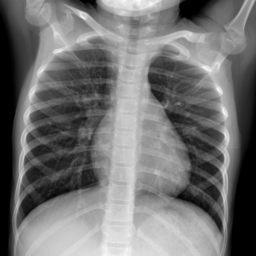

Label: 0.0


In [82]:
def make_batch(image_filepaths, im_size, batch_size):

    # Randomly sample image filepaths for the batch.
    batch_paths = random.sample(image_filepaths, batch_size)

    batch = np.zeros((batch_size, im_size, im_size))
    labels = np.zeros((batch_size))

    for i, path in enumerate(batch_paths):
        im = Image.open(path)
        batch[i] = crop_and_scale(im, im_size)
        labels[i] = "PNEUMONIA" in path

    return batch, labels

train_fps = get_filepaths("train")
batch, labels = make_batch(train_fps, 256, 4)

print(labels)

# Inspect an image from the batch.
i = 0
im = Image.fromarray((batch[i] * 255.0).astype(np.uint8))
display(im)
print("Label: {}".format(labels[i]))

**Solution explanation**

There are many ways to do this within this function. A concise way of creating the labels is:

```python
labels = np.array([0.0] * sample_size + [1.0] * sample_size)
```

The `[0] * sample_size` array duplication syntax has been used here to make the code concise. As we know that the first half of the sample is normal, and the second half is not, we can just create the labels.

Another way to accomplish this is to look through the file path for each image when it is being opened and processed, and if `NORMAL` is in the file path, set the label to 0, and vice versa. This will take more lines of code and will be more inefficient than the above.

# Stage 4 - Creating the model

We are now at the stage that we can create our model. The model that we will use in this seminar is a **convolutional neural network**. These networks start with convolutional layers, which "look" at small regions across the image with kernels, followed by dense neural network layers. These gradually reduce towards to the final layer, which contains a single neuron - this will output a number between 0 and 1, indicating the prediction of `NORMAL` or `PNEUMONIA`.

To create the model, we will be using the `keras` library, which is part of TensorFlow, Google's machine learning framework.

Often, researchers and data scientists will adapt exist models to fit their needs. A good example of this is UNet, a type of convolutional neural network (autoencoder) that has been used for multiple different biomedical applications.

To give you a feeling for what this process is like, there is a script below which contains the fictional model training code for a model from an ornithologist that can distinguish between finches and swallows. Throughout this stage of the notebook, you will adapt the code to suit our medical application.

The code is shown below:

```python
# FINCH-NET Code. MIT Licence, 2024. Code by Dr Ala Wing
from tensorflow import keras

img_size = 256

# The shape of each image in the batch
input_shape = (img_size, img_size, 1)

# Create the model
model = keras.Sequential([
    keras.Input(shape=input_shape),
    keras.layers.Conv2D(128, 5, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(512, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

model.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer="adam",
    metrics=["accuracy"]
)

train_gen = batch_generator(
    total_size=1024,
    batch_size=8,
    image_crop_region=(img_size,img_size),
    data_name="train"
)

val_gen = batch_generator(
    total_size=1024,
    batch_size=8,
    image_crop_region=(img_size,img_size),
    data_name="val"
)

# Label structure: ["Finch", "Swallow"]

model.fit(
    train_gen,
    epochs=250,
    steps_per_epoch=1024 / 8,
    validation_data=val_gen,
    validation_batch_size=1,
    validation_steps=32 / 8
)
```

## Explanation of the model architecture

The first half of the model has convolutional (`Conv2D`) and max pooling (`MaxPooling2D`) layers.

1. **`Conv2D`**

This layer is declared like this:

```python
keras.layers.Conv2D(1024, 5, activation='relu'),
```

The parameter `1024` refers to the number of kernels (or filters) that will be used in this layer. Much like different kernels can extract edges or blur images eariler in the course, each kernel here is "learnt" and extracts different information from the image.

The parameter `5` refers to the kernel size. It refers to the square dimension of the kernel, and therefore how much of the image it "looks" at during each convolution (e.g. a 5x5 pixel area).

The parameter `activation='relu'` refers to the activation function of the layer. This describes the non-linear function that the neuron in the layer will use. Reasons for selecting different activation functions is partly outside the scope of this course - ReLU layers are commonly used within machine learning.


2. **`MaxPooling2D`**

This layer reduces the dimensions of the input image by half. It does this by "looking" at 2x2 groups of pixels across the whole image and selecting the largest value. This allows the model to gradually downsample the image, allowing the layers to become smaller as the model extracts higher-order data.

3. **`keras.layers.Flatten()`**

This layer flattens 2D collections of neurons into a 1D array, which is necessary before the `Dense` layers.

4. **`keras.layers.Dense(128, activation='relu')`**

`Dense` layers are flat layers of fully connected neurons, which are a staple layer for building neural networks. They are fully connected, so that they can "see" data from all over the image, unlike the convolution layers, which could only "see" data from small regions.

The `128` parameter refers to the number of neurons that the layer has. More neurons means that the network can represent more data, but are slower to run and take up more memory. More neurons can also increase the risk of overfitting.

The final layer is shown below:

```python
keras.layers.Dense(1, activation='sigmoid')
```

It has 1 neuron and has a sigmoid activation function. You may remember the shape of sigmoid curves from the oxygen dissociation curves from haemoglobin from physiology - here it ensures that the output neuron only displays a number between 0 and 1.

## Exercise 9 - Model summary

Declare the FINCH-NET model and print a summary of it's structure using the code above.

Try changing the parameters of the model and running the code again - what happens to overall model parameter number? Which layers have the largest impact on overall parameter number and model size?

What are the main differences between the input for our network and the FINCH-NET network? How might we have to change it?

### Solution

In [11]:
img_size = 256

# The shape of each image in the batch
input_shape = (img_size, img_size, 1)

# Create the model
model = keras.Sequential([
    keras.Input(shape=input_shape),
    keras.layers.Conv2D(128, 5, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(512, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 252, 252, 128)       │           3,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 126, 126, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 124, 124, 512)       │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1968128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │     251,920,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 252,518,337 (963.28 MB)

 Trainable params: 252,518,337 (963.28 MB)

 Non-trainable params: 0 (0.00 B)

**Solution Explanation**

The layer that has the largest effect on the size of the model is the first `Dense` layer, as this interacts with the large, flattened convolutional layer.

The size of the input image is `(size, size, 1)`, which is different to our images, which have no last channel - `(size, size)`. This is a common feature of input layers of neural networks.

# Stage 5 - Compiling the model

Next, the model must be compiled. This refers to the process of setting the parameters of how the model will be trained, and what the model training functions will report back to us during training. The compliation code for FINCH-NET is shown below:

```python
model.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer="adam",
    metrics=["accuracy"]
)
```

1. `keras.losses.BinaryCrossentropy()`

This declares the **loss function**, which is the function with which the network determines how far its prediction is from the labels. Many different loss functions can be selected for different reasons - this is beyond the scope of this course. The most common are categorical or binary crossentropy.

Crossentropy measures the difference between two probability distributions. This allows the model to objectively measure how incorrect it is. This allows it to determine how aggressively to correct its weights. Working code examples are given below if you are interested:



In [12]:
from math import log

def binary_crossentropy(predicted, true_val):
    return true_val * log(predicted) + (1 - true_val) * log(1 - predicted)

# Image is pneumonia, model predicts high probability of pneumonia
print("Model is correct: ", binary_crossentropy(0.99, 1.0))

# Image is pneumonia, model predicts  low probability of pneumonia
print("Model is wrong: ", binary_crossentropy(0.05, 1.0))

Model is correct:  -0.01005033585350145
Model is wrong:  -2.995732273553991


2. `optimizer="adam"`

This declares the optimiser that the model uses to optimise its weights. How different optimisers work is beyond the scope of this course, but different optimisers cause the weights to be explored differently.

Thinking back to the ball on a hill analogy, the optimiser controls where the ball starts, and the rules by which it rolls across the landscape.

3. `metrics=["accuracy"]`

This list determines the model evaluation metrics that are reported back to us during training. Unfortunately, accuracy does not sum up the full performance of a model - we will discuss this during the seminars and later in this workbook.

# Stage 6 - Generating batches for the FINCH-NET model

Looking at the FINCH-NET code, the `model.fit` method is passed `train_gen`, which is generated from the function `batch_generator`, to which we do not have access. However, the function name suggests that it is a **generator**.

**Generators** are Python objects that are similar functions, but can return data "on the fly" when they are being executed without returning by using the `yield` keyword.

They are commonly used when building memory-intensive code, as they allow small chunks of data to be loaded, one at a time - like batches!

Usually, you cannot load your entire training dataset into RAM from your disk during training. Here, generators are helpful in providing the model with small chunks of data at a time, to prevent all of the training data being transferred into memory in one go. A simple example of a generator that generates incrementing powers of 2 is given below to give you an idea of how they work.


In [13]:
def powers_of_two(length):
    for i in range(length):
        yield 2 ** i

gen = powers_of_two(10)

for number in gen:
    print(number)

1
2
4
8
16
32
64
128
256
512


In addition to this, each image within a batch of the FINCH-NET training data has the following shape:

```python
# The shape of each image in the batch
input_shape = (img_size, img_size, 1)
```

This is different to the return shape of our current `make_batch` function.

## Exercise 10 - Creating the training generator

Wrap the existing `make_batch` function in a seperate function called `batch_generator`. It should have the following features:

1. The array shape of each image of the batch should match the image shape of the FINCH-NET input. (*Hint: expand_dims*)
2. Use the yield keyword to create each batch.

We don't have access to the original FINCH-NET `batch_generator` function, but the team have kindly provided the docstring for the function. Use this to help you design your wrapper. Only the outputs of the function must match, as this is what their Keras CNN is expecting - feel free to set whichever input parameters you think are most appropriate.


```python
def batch_generator()
    """
    Returns a generator to generate all training data for an epoch of training for FINCH-NET.

    Parameters
    ----------
    total_size : int
        The total size of the training dataset for this epoch.
    batch_size : int
        The desired size of the batch.
    image_crop_region : tuple
        The square region to crop. Birds are always postition centrally in the image.
    data_name : str
        The name of the dataset to pull the bird images from.

    Yields
    -------
    np.array
          Batch of images for training. Shape: (batch_size, im_size, im_size, 1)
    np.array
          Batch of labels, label encoded. Shape: (batch_size)
    """


## Solution

In [83]:
def batch_generator(batch_num, batch_size, partition, im_size):

    # Get the filepaths that can be sampled
    dataset_fps = get_filepaths(partition)
    batch, labels = make_batch(train_fps, 256, 4)

    for i in range(batch_num):
        batch, labels = make_batch(dataset_fps, im_size, batch_size)

        # Expand the dims along the 3rd axis (4th dimension)
        # to make the batch compatible with the model
        batch = np.expand_dims(batch, axis=3)

        yield batch, labels

example_gen = batch_generator(
    batch_num=1,
    batch_size=4,
    partition="train",
    im_size=64
)

for batch, labels in example_gen:
    print(batch.shape)

(4, 64, 64, 1)


**Solution explanation**

We have used the `np.expand_dims()` method to make the shape of our batch align with the one from the FINCH-NET example. This is a common modification that has to be done for inputting data into neural networks.

We use the `yield` keyword to yield the images and labels for each batch of training data.

# Stage 7 - Training the model

We have finally reached the point where we can train the model, based on the FINCH-NET code above. This will utilise all the code we have written so far to feed the model for training.

Training is split into mutliple stages:

1. **Batch Step**

This is the smallest division of training that we control - the model creates a prediction for every image in the batch, and the weights are updated based on the average error across all of the image predictions.

2. **Epoch**

An epoch of training contains a certain number of steps per epoch. Batch steps are repeated to train the model.

Training occurs for a specified number of epochs. When using a generator, you must make sure that the generators can create the total amount of data that will be needed over the entire training period: `batch_size * steps_per_epoch * epoch_number`.

## Exercise 11 - Adapting FINCH-NET for pneumonia classification

Use the FINCH-NET code and the generator from the previous exercise to train the neural network. Experiment with reducing the size of the model - does this improve the training time or decrease the accuracy?

### Solution

In [84]:
img_size = 64

# The shape of each image in the batch
input_shape = (img_size, img_size, 1)

# Create the model
model = keras.Sequential([
    keras.Input(shape=input_shape),
    keras.layers.Conv2D(64, 5, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

model.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer="adam",
    metrics=["accuracy"]
)

epochs = 10
steps_per_epoch = 20
validation_steps = 4

train_gen = batch_generator(
    batch_num=steps_per_epoch * epochs,
    batch_size=8,
    partition="train",
    im_size=img_size
)

val_gen = batch_generator(
    batch_num=4 * epochs,
    batch_size=2,
    partition="val",
    im_size=img_size
)

model.fit(
    train_gen,
    epochs = 10,
    steps_per_epoch = steps_per_epoch,
    validation_data = val_gen,
    validation_batch_size = 2,
    validation_steps = validation_steps
)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)                   │ (None, 60, 60, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │         401,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 440,065 (1.68 MB)

 Trainable params: 440,065 (1.68 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 235ms/step - accuracy: 0.5167 - loss: 0.7008 - val_accuracy: 0.5000 - val_loss: 0.9936
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.6803 - loss: 0.6355 - val_accuracy: 0.5000 - val_loss: 0.6996
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - accuracy: 0.7212 - loss: 0.5272 - val_accuracy: 0.6250 - val_loss: 0.6034
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 262ms/step - accuracy: 0.7163 - loss: 0.4275 - val_accuracy: 0.6250 - val_loss: 0.5452
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - accuracy: 0.7188 - loss: 0.4464 - val_accuracy: 0.6250 - val_loss: 0.5062
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 0.6905 - loss: 0.3250 - val_accuracy: 0.8750 - val_loss: 0.5961
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 265ms/step - accuracy: 0.9119 - loss: 0.3349 - val_accuracy: 1.0000 - val_loss: 0.6103
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 182ms/step - accuracy: 0.9209 - loss: 0.3602 - val_accuracy: 0.

**Solution explanation**

The generators have been modified appropriately to generate all of the data that is needed for the training period. The number of images in each validation batch has been set to two - one PNEUMONIA and one NORMAL.

## Exercise 12 - Saving the model

Short exercise: Use [this documentation](https://www.tensorflow.org/tutorials/keras/save_and_load) to save the model as a Keras file.

Saving models will allow us to evaluate different models that we train to see how they perform.

### Solution

In [16]:
model.save('first_model.keras')

# Stage 8 - Evaluating the model

Now we have a preliminary trained model, we can start to evaluate its performance on the test dataset. Before we start this process, what is the best way to evaluate a binary classifier?

A binary classifer is any predictor that predicts an event that has two possible outcomes. An example includes:

1. An ML algorithm that detects an extremely rare disease called Finch's disease (fictional). The prevalence of Finch's is 1 in 1 million.

The model's accuracy is 99.8%. When the engineers look closer, they realise that the model is simply predicting "NORMAL" for each scan, as there is so little data on Finch's disease.

How can we more holistically capture information about the model?

## Exercise 13 - Better Metrics

Using [this documentation](https://keras.io/api/metrics/) and your knowledge from the seminar, add metrics to the training code from Exercise 11 that will give us greater insight into how the model is actually performing during training.




### Solution

In [17]:

img_size = 64

# The shape of each image in the batch
input_shape = (img_size, img_size, 1)

# Create the model
model = keras.Sequential([
    keras.Input(shape=input_shape),
    keras.layers.Conv2D(64, 5, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

model.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer="adam",
    metrics=["accuracy", keras.metrics.Precision, keras.metrics.Recall, keras.metrics.AUC] # Modified
)

epochs = 10
steps_per_epoch = 20
validation_steps = 4

train_gen = batch_generator(
    batch_num=steps_per_epoch * epochs,
    batch_size=8,
    partition="train",
    im_size=img_size
)

val_gen = batch_generator(
    batch_num=4 * epochs,
    batch_size=2,
    partition="val",
    im_size=img_size
)

model.fit(
    train_gen,
    epochs = 10,
    steps_per_epoch = steps_per_epoch,
    validation_data = val_gen,
    validation_batch_size = 2,
    validation_steps = validation_steps
)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 60, 60, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │         401,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 440,065 (1.68 MB)

 Trainable params: 440,065 (1.68 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 217ms/step - accuracy: 0.6406 - auc: 0.7313 - loss: 0.6426 - precision: 0.7086 - recall: 0.4990 - val_accuracy: 0.7500 - val_auc: 0.8750 - val_loss: 0.6833 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 263ms/step - accuracy: 0.9040 - auc: 0.9361 - loss: 0.3406 - precision: 0.8958 - recall: 0.9148 - val_accuracy: 0.6250 - val_auc: 0.6250 - val_loss: 0.7105 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 0.8853 - auc: 0.9652 - loss: 0.2639 - precision: 0.9473 - recall: 0.8188 - val_accuracy: 0.7500 - val_auc: 0.8750 - val_loss: 0.5194 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.9130 - auc: 0.9725 - loss: 0.2229 - precision: 0.9451 - recall: 0.8785 - val_accuracy: 0.6250 - val_auc: 1.0000 - val_loss: 1.3947 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━

**Solution Explanation**

This code adds different metrics to the `metrics` array when compiling the model. The AUC gives us information overall information about how well the model works as a classifier, and recall gives us insight into its sensitivity for detecting pnuemonia.

In the example of the disease predictor, the recall of a model that predicts NORMAL every time would be **0%**.

## Exercise 14 - Better Models

Using your knowledge from the first seminar and online sources, modify the model's structure and hyperparameters from Exercise 13 to increase the performance. Try changing the learning rate, batch size, model architecture, and input image resolution. What has the largest effects?

Save two versions of the model to allow you to compare them later on in the workbook. *N.B. Keras does not allow you to save the models to keras format when they have custom metrics - use HDF5 format.*

### Solution

In [67]:
img_size = 128

# The shape of each image in the batch
input_shape = (img_size, img_size, 1)

# Create the model
model = keras.Sequential([
    keras.Input(shape=input_shape),
    keras.layers.Conv2D(256, 5, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(128, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

model.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer="adam",
    metrics=["accuracy"] # Modified
)

epochs = 10
steps_per_epoch = 20
validation_steps = 4

train_gen = batch_generator(
    batch_num=steps_per_epoch * epochs,
    batch_size=8,
    partition="train",
    im_size=img_size
)

val_gen = batch_generator(
    batch_num=4 * epochs,
    batch_size=2,
    partition="val",
    im_size=img_size
)

model.fit(
    train_gen,
    epochs = epochs,
    steps_per_epoch = steps_per_epoch,
    validation_data = val_gen,
    validation_batch_size = 2,
    validation_steps = validation_steps
)

model.save("second_model.h5")

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 124, 124, 512)       │          13,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 62, 62, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 60, 60, 256)         │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 28, 28, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │         294,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,930,881 (7.37 MB)

 Trainable params: 1,930,881 (7.37 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 169s 7s/step - accuracy: 0.6302 - loss: 0.6734 - val_accuracy: 0.8750 - val_loss: 0.5007
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 133s 7s/step - accuracy: 0.8737 - loss: 0.3379 - val_accuracy: 0.6250 - val_loss: 0.5912
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 142s 7s/step - accuracy: 0.8810 - loss: 0.3174 - val_accuracy: 0.7500 - val_loss: 0.6107
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 143s 7s/step - accuracy: 0.8603 - loss: 0.4479 - val_accuracy: 0.8750 - val_loss: 0.4728
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 126s 6s/step - accuracy: 0.8821 - loss: 0.2986 - val_accuracy: 0.6250 - val_loss: 0.6026
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 142s 7s/step - accuracy: 0.8949 - loss: 0.2584 - val_accuracy: 0.5000 - val_loss: 1.6644
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 143s 7s/step - accuracy: 0.8848 - loss: 0.2978 - val_accuracy: 0.6250 - val_loss: 0.7969
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 135s 7s/step - accuracy: 0.9062 - loss: 0.2163 - val_accuracy: 0.7500 - v

## Exercise 15 - Testing the model on the test dataset

Evaluate the model using the test dataset. To do this, build a new function that generates a random sample all of the images in the dataset once, rather than generating random batches. Use your `make_batch` function to help you.

### Solution

In [89]:
sample_num = 10

model = load_model("second_model.h5")
test_paths = get_filepaths("test")
test_x, test_y = make_batch(test_paths, batch_size=sample_num, im_size=128)

predictions = model.predict([test_x, test_y])

for pair in zip(predictions, test_y):
    print(f"Model {pair[0][0]}, Truth: {pair[1]}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step
Model 0.8649064302444458, Truth: 1.0
Model 0.06334730237722397, Truth: 0.0
Model 0.8158929944038391, Truth: 1.0
Model 0.8330300450325012, Truth: 1.0
Model 0.9346488118171692, Truth: 1.0
Model 0.9314472675323486, Truth: 1.0
Model 0.9406660795211792, Truth: 1.0
Model 0.7472755312919617, Truth: 1.0
Model 0.28015804290771484, Truth: 0.0
Model 0.8435873985290527, Truth: 1.0
Model 0.9110704064369202, Truth: 1.0
Model 0.2514994442462921, Truth: 0.0
Model 0.2890143394470215, Truth: 0.0
Model 0.9290797710418701, Truth: 0.0
Model 0.545481264591217, Truth: 0.0
Model 0.9040954113006592, Truth: 1.0
Model 0.6715402007102966, Truth: 1.0
Model 0.8691059350967407, Truth: 1.0
Model 0.9500210881233215, Truth: 1.0
Model 0.24317336082458496, Truth: 0.0
Model 0.8325372934341431, Truth: 1.0
Model 0.46388718485832214, Truth: 0.0
Model 0.5416370034217834, Truth: 1.0
Model 0.47124695777893066, Truth: 0.0
Model 0.12513767182826996, Truth: 0.0
Model 0.42230522632598877, Trut

'\ntrain_gen = batch_generator(\n    batch_num=300,\n    batch_size=100,\n    partition="test",\n    im_size=img_size\n)\n\nmodel.compile(\n    loss=keras.losses.BinaryCrossentropy(),\n    optimizer="adam",\n    metrics=["accuracy"]\n)\n\nmodel.evaluate(train_gen)\n'

## Exercise 16 - Create an ROC curve

Use the predictions from the last exercise to create an ROC curve. Use the `metrics` class from `sklearn.metrics` library to do this.

Text(0.5, 1.0, 'ROC Curve for Pneumonia classifier: AUC = 0.869')

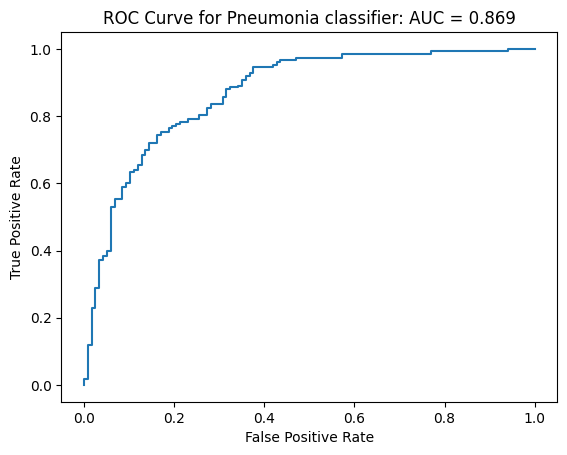

In [90]:
false_pos_rate, true_pos_rate, _ = metrics.roc_curve(test_y, predictions)

plt.plot(false_pos_rate, true_pos_rate)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

auc = metrics.auc(false_pos_rate, true_pos_rate)
plt.title(f"ROC Curve for Pneumonia classifier: AUC = {auc:.3f}")

## Exercise 17 - Comparing two models

Adapt your code from Exercise 16 into a function which evaluates a model that is passed to it. Use this function to evaluate two of your models and plot their ROC curves on the same axes.

Make sure your evaluator can handle the case that models do not have the same input image size.

In [ ]:
# Enter your your solution here...

### Solution

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_5
Received: inputs=('Tensor(shape=(32, 128, 128))', 'Tensor(shape=(32,))')
  warnings.warn(msg)


 9/10 ━━━━━━━━━━━━━━━━━━━━ 6s 7s/step 

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_5
Received: inputs=('Tensor(shape=(None, 128, 128))', 'Tensor(shape=(None,))')
  warnings.warn(msg)


10/10 ━━━━━━━━━━━━━━━━━━━━ 65s 6s/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_3
Received: inputs=('Tensor(shape=(32, 128, 128))', 'Tensor(shape=(32,))')
  warnings.warn(msg)


 9/10 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_3
Received: inputs=('Tensor(shape=(None, 128, 128))', 'Tensor(shape=(None,))')
  warnings.warn(msg)


10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step


Text(0.5, 1.0, 'ROC Curves for Pneumonia classifiers')

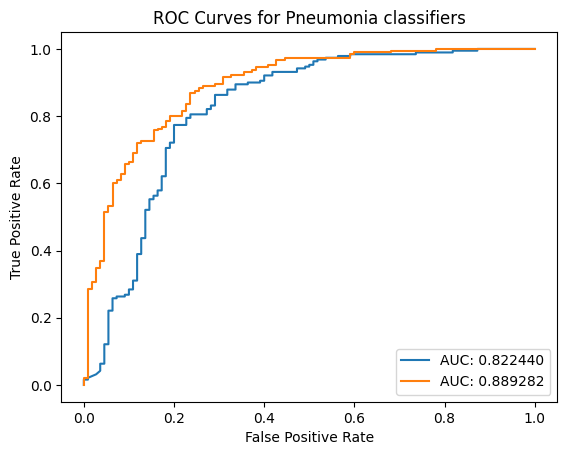

In [92]:
def model_evaluator(model, sample_size):

    # Set the seed so that the evaluation data is the same each time
    random.seed(0)

    # Determine the input image size from the model
    input_size = model.input_shape[1]

    test_paths = get_filepaths("test")
    test_x, test_y = make_batch(test_paths, batch_size=sample_size, im_size=input_size)

    predictions = model.predict([test_x, test_y])

    false_pos_rate, true_pos_rate, _ = metrics.roc_curve(test_y, predictions)
    auc = metrics.auc(false_pos_rate, true_pos_rate)

    return false_pos_rate, true_pos_rate, auc

sample_size = 300

model = load_model("third_model.h5")
fpr_1, tpr_1, auc_1 = model_evaluator(model, sample_size)

model = load_model("second_model.h5")
fpr_2, tpr_2, auc_2 = model_evaluator(model, sample_size)

plt.plot(fpr_1, tpr_1, label=f"AUC: {auc_1:3f}")
plt.plot(fpr_2, tpr_2, label=f"AUC: {auc_2:3f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.title(f"ROC Curves for Pneumonia classifiers")

## Exercise 18 - Getting better model performance

Using the evaluation plotting tool above, use all of your existing code to experiment with different values for hyperparameters and model architecture to extract the best performance you can.

**There will be a prize for the model with the best AUC score within the constraints of the code above!**

### Solution

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
Pneumonia


<ipython-input-105-bff5650bccae>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_label = labels[int(test_y)]
<ipython-input-105-bff5650bccae>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_label = labels[int(predictions)]


Text(0.5, 1.0, 'CXR: Pneumonia, Predicted: Normal')

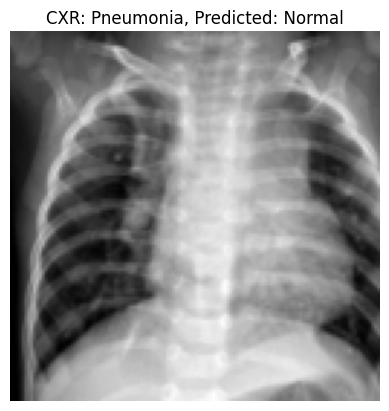

In [105]:
model = load_model("second_model.h5")

test_paths = get_filepaths("test")

input_size = model.input_shape[1]
test_x, test_y = make_batch(test_paths, batch_size=1, im_size=input_size)

predictions = model.predict([test_x, test_y])

plt.axis("off")
plt.imshow(test_x[0], cmap="grey")

labels = ["Normal", "Pneumonia"]

true_label = labels[int(test_y)]
pred_label = labels[int(predictions)]

print(true_label)
plt.title(f"CXR: {true_label}, Predicted: {pred_label}")

## Exercise 19 - Visualising these predictions

ROC curves sum up the model performance, but we want to see the predictions for the chest XRs that the model is making.

Use `pyplot` to display a single image with the prediction from the model. Use a threshold of `0.5` for the model's predictions. Adapt the code from your model evaluator to help you.

### Solution

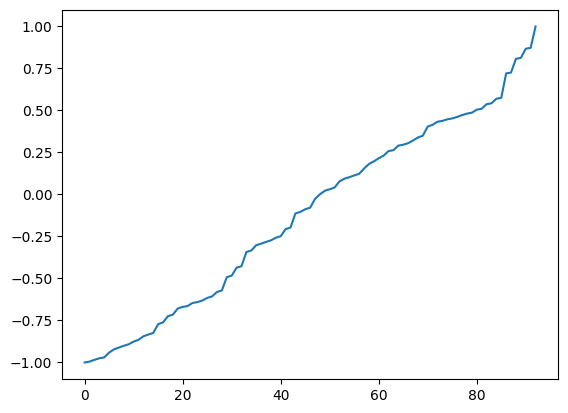

# Stage 9 - Taking this further

There are more techniques that we could use to improve the performance of this model. Some of these are listed below:

## Utilising data augmentation

This could involve randomly **rotating**, **scaling**, and **flipping** the images - *refer for to the seminar for a reminder.*

This would be fairly easy to implement in the `crop_and_scale` function.

**Extension exercise:** Modify the code to augment the training data when training the model.

## Identifying different types of pneumonia

You may have noticed that the filenames of the images contain **additional labels** - `bacterial` and `viral`. The model could be modified to have **3 output neurons** rather than just 1, and **could be used to differentiate** between normal, bacterial pneumonia, and viral pneumonia.

**Extension exercise:** Modify the model and training code to differentiate between normal scans, scans with viral pneumonia, and scans with bacterial pneumonia.